In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data1=pd.read_csv(r"C:\Users\Gazal V\Desktop\Ai and machine learning\Wholesale customers data.csv")

In [4]:
data1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data1.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
data1.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
data1.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
dtype: float64

In [9]:
data1.var()

Channel             2.190723e-01
Region              5.994978e-01
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicassen          7.952997e+06
dtype: float64

In [10]:
data1['Channel'].nunique()

2

In [11]:
data1['Delicassen'].nunique()

403

# Kmeans

In [12]:
x=data1[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper']]

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss =[]
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=10,init='k-means++')
    km.fit(x)
    css= km.inertia_ #wcss score
    wcss.append(css)

In [15]:
wcss

[154104491623.34546,
 109971068735.9475,
 77056468427.6188,
 61848345111.607666,
 49950152571.301,
 44189334034.13515,
 38940641217.471664,
 34087427039.67752,
 31295768121.582798,
 27760436785.151184]

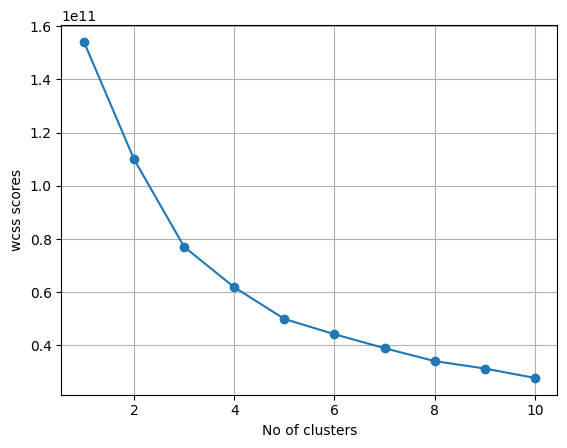

In [16]:
plt.plot(range(1,11),wcss,marker = 'o')
plt.xlabel('No of clusters')
plt.ylabel('wcss scores')
plt.grid()
plt.show()

In [17]:
km=KMeans(n_clusters = 5,n_init=10,init='k-means++')

In [18]:
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [19]:
cluster_labels=km.predict(x)

In [20]:
cluster_labels

array([3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 3, 0, 0, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 1, 0, 0, 3, 3, 1, 2, 0, 3, 0, 0, 3, 3, 0, 1, 1, 2, 0, 0, 1, 1,
       3, 1, 1, 4, 3, 1, 3, 3, 2, 1, 0, 3, 1, 1, 3, 3, 3, 4, 3, 1, 3, 4,
       3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 1, 3, 3, 3, 1, 3, 0, 3, 4, 4, 2,
       3, 0, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 2, 3, 0, 1, 1, 3, 1,
       3, 1, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 2, 0, 0, 3, 2, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 0, 1, 3, 3, 3, 0, 0, 3, 0, 3,
       3, 1, 1, 0, 3, 1, 3, 3, 0, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1,
       2, 3, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 1, 1, 0, 3, 3, 1, 3, 0, 0, 3,
       3, 3, 1, 1, 0, 3, 3, 1, 3, 3, 3, 1, 0, 4, 3, 3, 1, 1, 1, 0, 1, 3,
       0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 2, 0, 0,
       0, 3, 3, 1, 3, 3, 0, 3, 3, 1, 3, 0, 3, 0, 3, 3, 2, 2, 3, 3, 0, 3,
       1, 1, 1, 0, 1, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 0, 3, 3, 2, 0, 2, 2,
       3, 0, 0, 2, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 0,

In [21]:
pd.Series(cluster_labels).value_counts()

3    227
0    102
1     81
2     23
4      7
dtype: int64

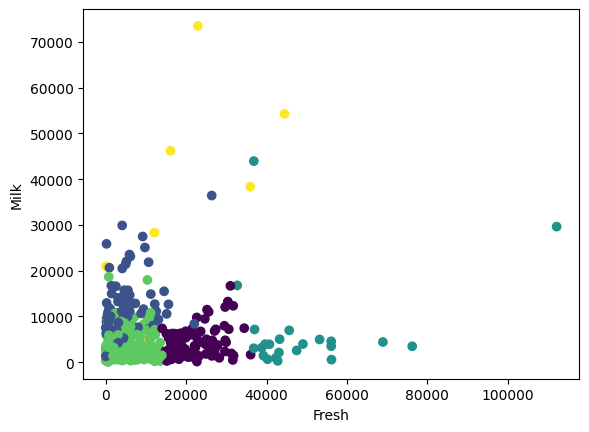

In [22]:
plt.scatter(x['Fresh'],x['Milk'],c=cluster_labels)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

In [23]:
cluster_indices=np.where(cluster_labels==0)

In [24]:
cluster_indices

(array([  4,  12,  13,  14,  18,  20,  22,  24,  25,  30,  32,  33,  36,
         40,  41,  54,  67,  70,  71,  73,  75,  83,  89, 105, 112, 113,
        114, 118, 120, 124, 126, 127, 132, 140, 141, 144, 149, 150, 152,
        157, 162, 190, 195, 196, 202, 210, 217, 220, 226, 232, 234, 237,
        240, 241, 242, 248, 253, 255, 262, 267, 269, 276, 279, 283, 287,
        288, 294, 296, 300, 307, 311, 322, 324, 328, 332, 334, 335, 347,
        354, 356, 360, 368, 371, 373, 380, 381, 382, 387, 393, 401, 402,
        403, 404, 406, 421, 422, 423, 424, 427, 432, 434, 435], dtype=int64),)

In [25]:
data1['Cluster_labels'] = cluster_labels

In [26]:
data1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,0


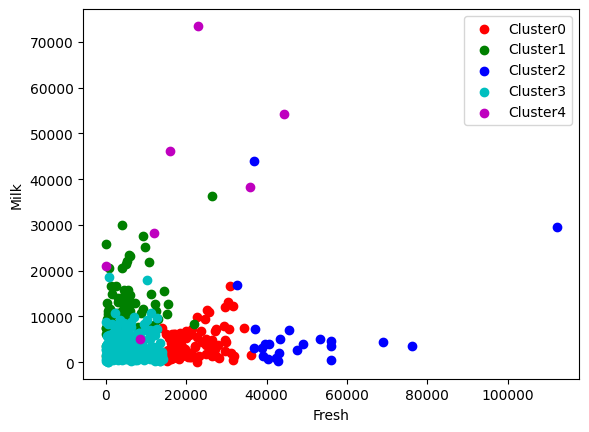

In [27]:
colors=['r','g','b','c','m']
for i in range(max(cluster_labels)+1):
    cluster_data=data1[cluster_labels==i]
    plt.scatter(cluster_data['Fresh'],cluster_data['Milk'],
               c=colors[i],label=f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend()
plt.show()

# Agglomerate Heirachial clustering

In [28]:
from scipy.cluster.hierarchy import linkage

In [29]:
from scipy.cluster.hierarchy import dendrogram


In [30]:
from scipy.cluster.hierarchy import fcluster

In [31]:
mergings= linkage(x,method='ward')

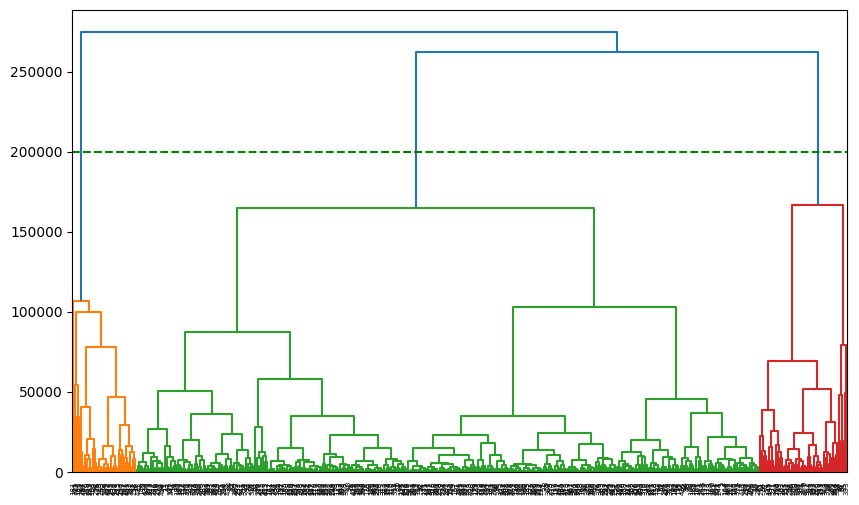

In [32]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(200000,color='green',linestyle='dashed')
plt.show()

In [33]:
cluster_labels_hc=fcluster(mergings,200000,criterion='distance')

In [34]:
cluster_labels_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 3,
       2, 3, 3, 3, 2, 3, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2,
       2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## Silhoutte Score

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
sil_score=silhouette_score(x,cluster_labels_hc)

In [37]:
sil_score

0.49192177817704547

In [38]:
sil_score1=silhouette_score(x,cluster_labels)

In [39]:
sil_score1

0.3770107964625542

# DB Scan

In [40]:
x=data1.iloc[:,[0,1]].values

In [41]:
x.shape

(440, 2)

In [42]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [43]:
model=db.fit(x)

In [44]:
label=model.labels_

In [45]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


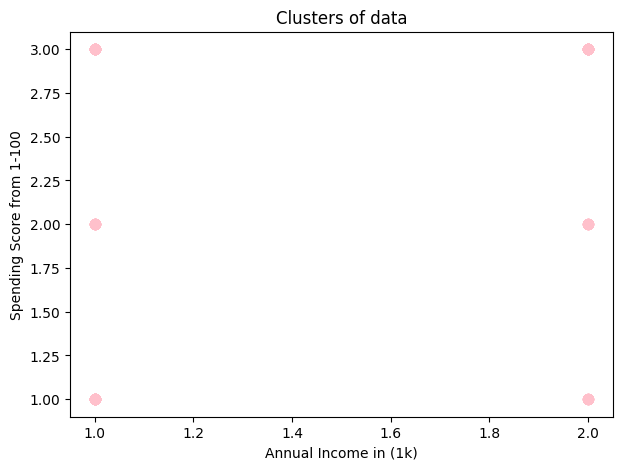

In [47]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()

In [48]:
data1.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011,-0.186726
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212,0.004307
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,-0.360554
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,-0.059718
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,-0.090296
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,-0.059495
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,-0.038016
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,-0.102767
Cluster_labels,-0.186726,0.004307,-0.360554,-0.059718,-0.090296,-0.059495,-0.038016,-0.102767,1.000000


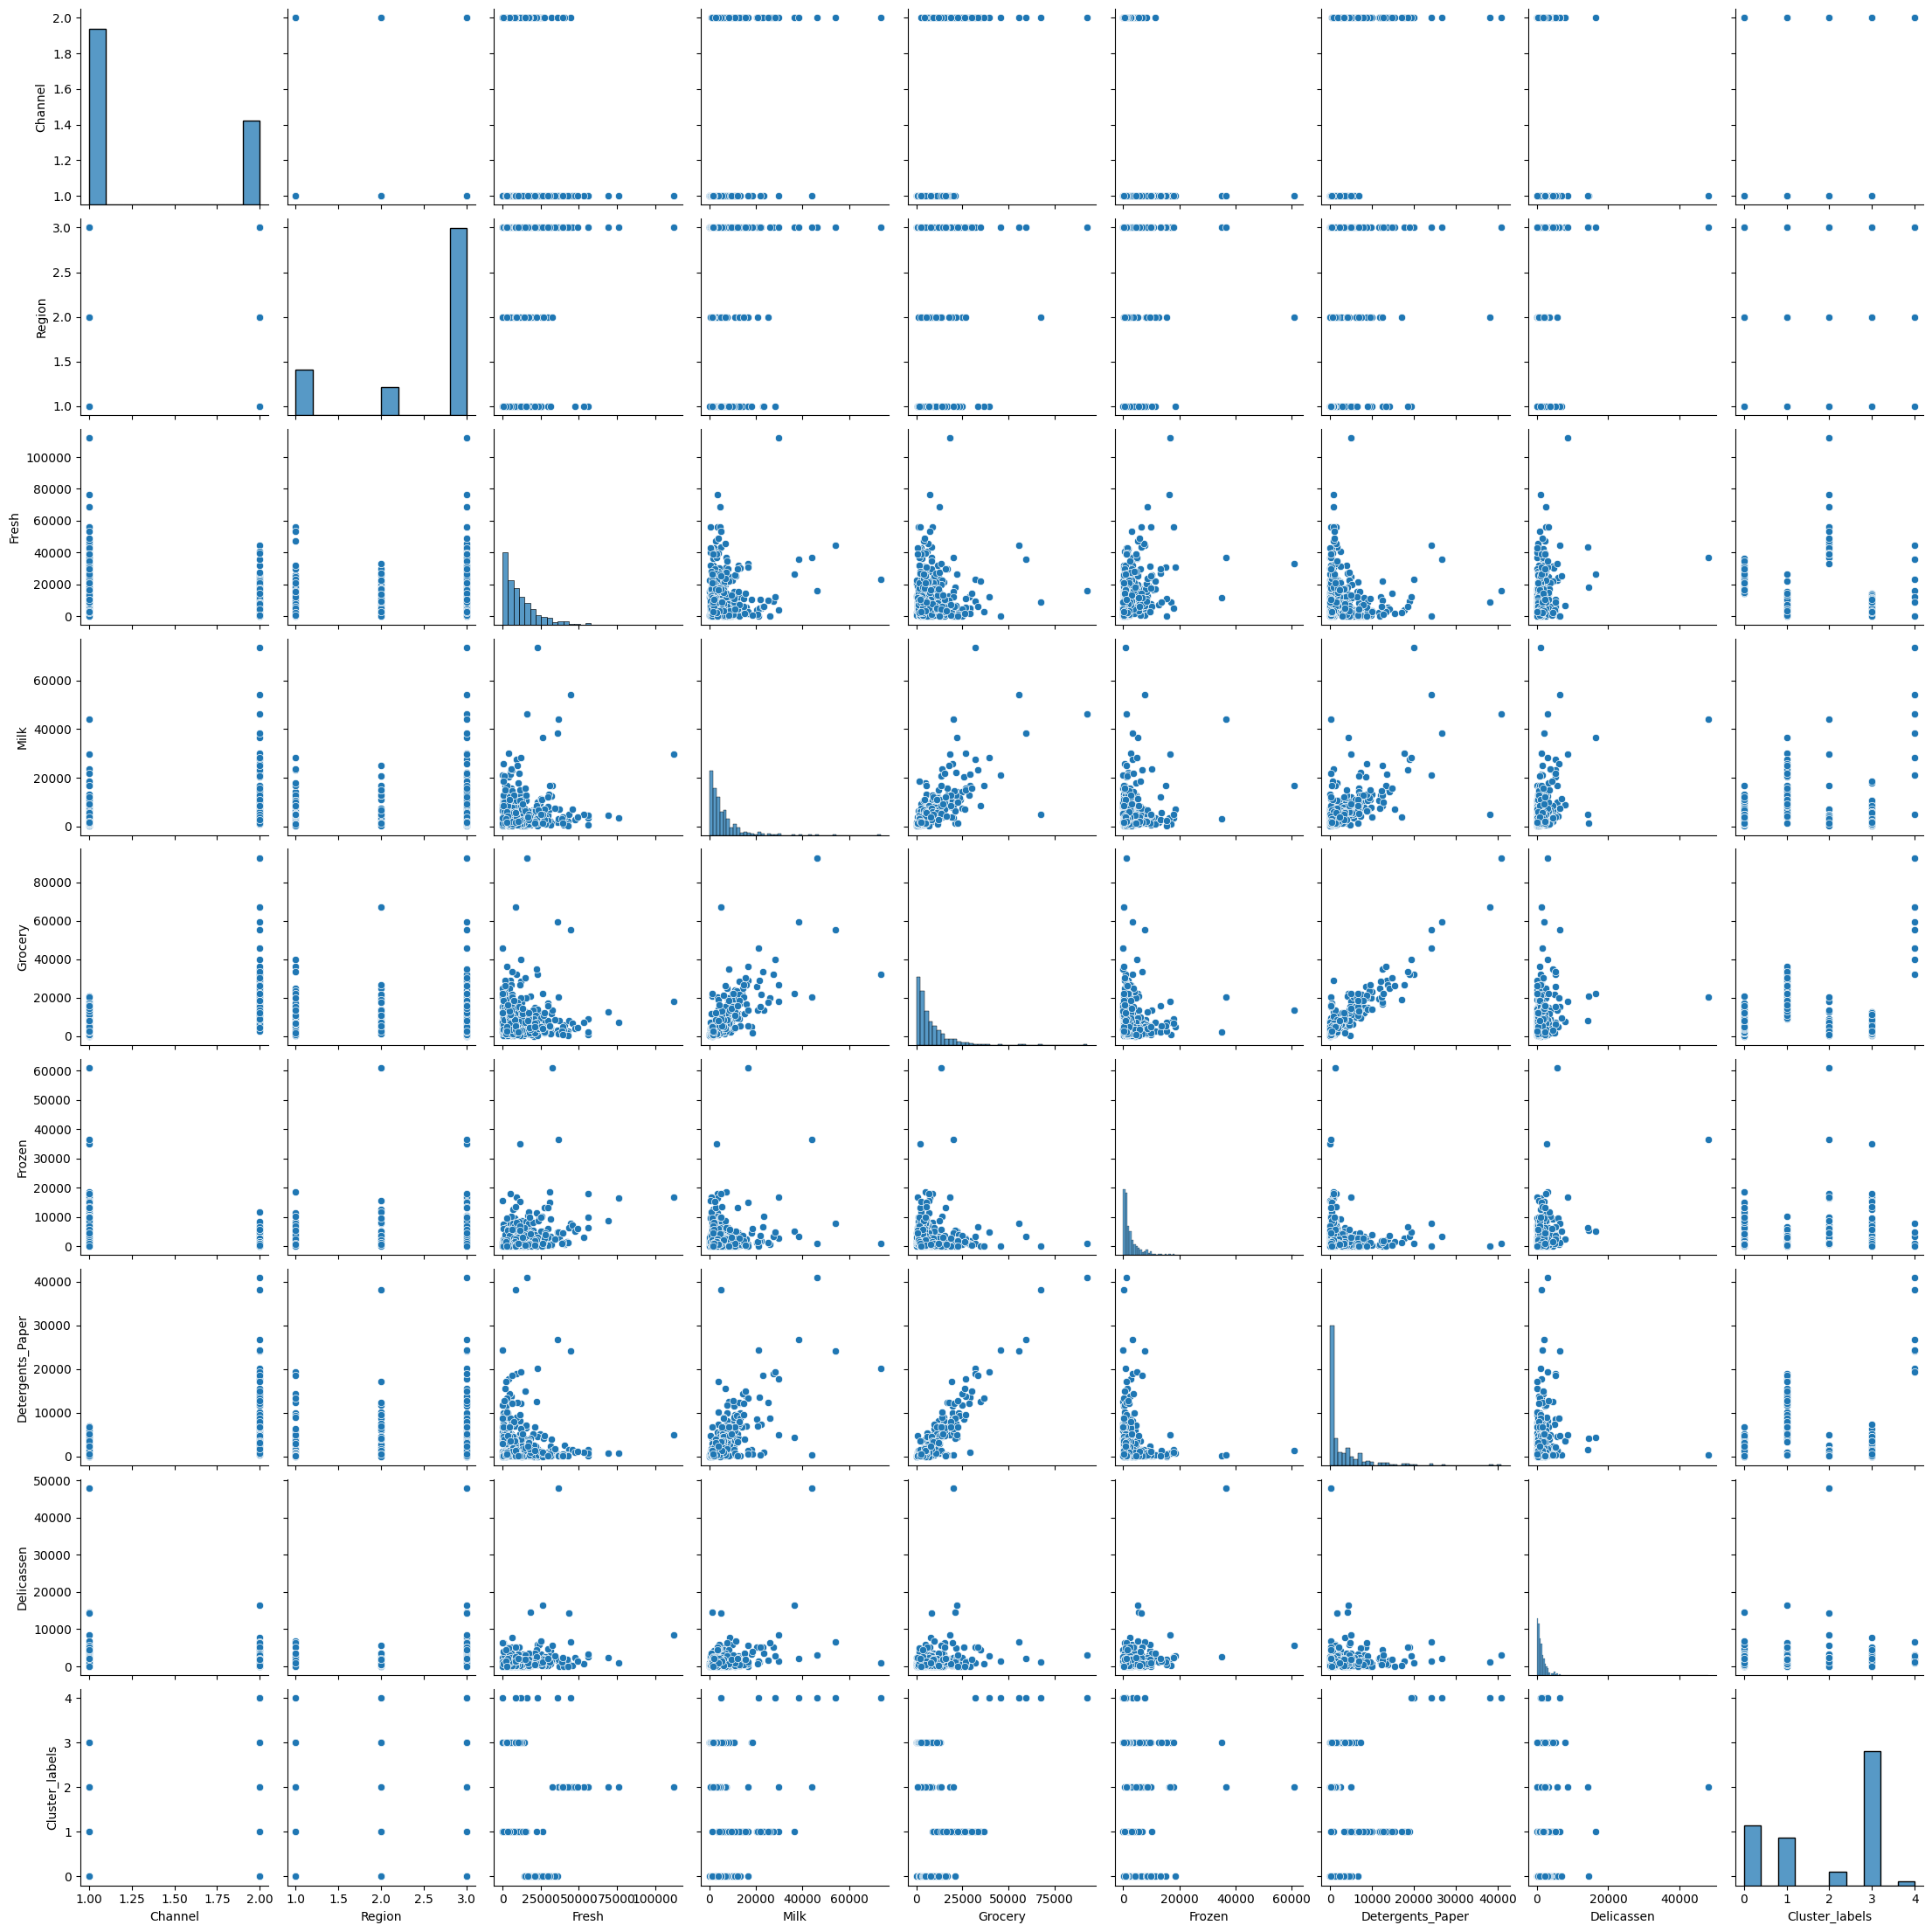

In [49]:
sns.pairplot(data1)

In [50]:
data1.index

RangeIndex(start=0, stop=440, step=1)

# PCA

In [51]:
from sklearn.preprocessing import scale 

In [52]:
scale(data1)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.04356873,
        -0.06633906,  0.8484389 ],
       [ 1.44865163,  0.59066829, -0.39130197, ...,  0.08640684,
         0.08915105,  0.8484389 ],
       [ 1.44865163,  0.59066829, -0.44702926, ...,  0.13323164,
         2.24329255,  0.8484389 ],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ...,  2.51121768,
         0.12145607, -0.69417728],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.56977032,
         0.21304614,  0.8484389 ],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.50488752,
        -0.52286938,  0.8484389 ]])

In [53]:
x=pd.DataFrame(scale(data1),index=data1.index,columns=data1.columns)

In [54]:
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_labels
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.848439
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.848439
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.848439
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0.848439
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-1.465485
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,-1.465485
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,0.077131
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,-0.694177
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,0.848439


In [55]:
from sklearn.decomposition import PCA

In [56]:
pc =PCA()

In [57]:
pc_array= pc.fit_transform(x)

In [58]:
pc_array

array([[ 0.76446279, -0.71723612,  0.12723069, ..., -1.29047138,
         0.56431389,  0.05433061],
       [ 0.97734074, -0.73349464,  0.43626773, ..., -1.04259192,
         0.43875785,  0.10804832],
       [ 1.19650797,  0.32984853,  1.16007357, ..., -1.18166261,
        -0.2828712 , -0.22068016],
       ...,
       [ 3.90779738, -0.38845816, -0.75657561, ...,  0.32226282,
        -0.55279898, -0.09952575],
       [-1.1720519 , -0.27944499,  0.58028778, ..., -0.04451576,
        -0.17279564, -0.02060181],
       [-1.25722843, -1.08871301,  0.4626239 , ...,  0.25065189,
         0.02662378,  0.02703084]])

In [59]:
pc_array.shape

(440, 9)

In [60]:
pc_array=pd.DataFrame(pc_array, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])

In [61]:
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,0.764463,-0.717236,0.127231,-0.797961,0.138803,-0.204579,-1.290471,0.564314,0.054331
1,0.977341,-0.733495,0.436268,-0.781349,0.362413,0.133071,-1.042592,0.438758,0.108048
2,1.196508,0.329849,1.160074,-0.943377,1.731206,-0.552819,-1.181663,-0.282871,-0.220680
3,-1.121453,0.363695,0.812514,-0.682542,-0.340360,0.262044,-0.101045,-0.335516,0.072922
4,0.790182,1.395512,-1.323861,-0.505380,1.298629,0.042356,-0.883570,-0.183405,-0.008304
...,...,...,...,...,...,...,...,...,...
435,0.393734,2.780625,-0.556187,-0.226602,-0.707750,0.903393,0.804627,0.415413,0.825667
436,-1.250255,1.627248,-0.507198,-0.603839,-0.953620,-0.700928,-0.741767,-0.302631,-0.202189
437,3.907797,-0.388458,-0.756576,-0.363882,-0.529631,-0.050468,0.322263,-0.552799,-0.099526
438,-1.172052,-0.279445,0.580288,-0.769282,0.039479,-0.571185,-0.044516,-0.172796,-0.020602


In [62]:
pc.explained_variance_

array([3.12351769, 1.86758166, 1.11840154, 1.00962366, 0.64787953,
       0.54051976, 0.36941894, 0.28113232, 0.06242603])

In [63]:
pc.explained_variance_ratio_*100

array([34.62687545, 20.70374618, 12.39844135, 11.19254514,  7.18230084,
        5.99212561,  4.09532616,  3.11659314,  0.69204613])

In [64]:
 34.58365692+20.82409214+12.21454915+11.18835652+7.14035732+6.06338239+4.17945143+3.11417973+0.6919744

100.00000000000001

In [65]:
pc_array.corr().round()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
pc1,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
pc2,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
pc3,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
pc4,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0,0.0,-0.0
pc5,0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0
pc6,0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0
pc7,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0,-0.0
pc8,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0
pc9,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0


In [66]:
pc1 = PCA(n_components=7)

In [67]:
pc1_array =pc1.fit_transform(x)

In [68]:
pc1_array = pd.DataFrame(pc1_array,columns =['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])

In [69]:
pc1_array

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,0.764463,-0.717236,0.127231,-0.797961,0.138803,-0.204579,-1.290471
1,0.977341,-0.733495,0.436268,-0.781349,0.362413,0.133071,-1.042592
2,1.196508,0.329849,1.160074,-0.943377,1.731206,-0.552819,-1.181663
3,-1.121453,0.363695,0.812514,-0.682542,-0.340360,0.262044,-0.101045
4,0.790182,1.395512,-1.323861,-0.505380,1.298629,0.042356,-0.883570
...,...,...,...,...,...,...,...
435,0.393734,2.780625,-0.556187,-0.226602,-0.707750,0.903393,0.804627
436,-1.250255,1.627248,-0.507198,-0.603839,-0.953620,-0.700928,-0.741767
437,3.907797,-0.388458,-0.756576,-0.363882,-0.529631,-0.050468,0.322263
438,-1.172052,-0.279445,0.580288,-0.769282,0.039479,-0.571185,-0.044516


In [70]:
pc1.explained_variance_ratio_*100

array([34.62687545, 20.70374618, 12.39844135, 11.19254514,  7.18230084,
        5.99212561,  4.09532616])

In [71]:
34.58365692+19.98165693+11.24193233+8.54557176+7.44121461+6.17481325+4.91850149

92.88734729000001

In [72]:
pc1_array.corr().round()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
pc1,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
pc2,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0
pc3,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0
pc4,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0
pc5,0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0
pc6,0.0,0.0,-0.0,0.0,0.0,1.0,-0.0
pc7,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0
